In [1]:
import pandas as pd
df = pd.read_csv("medical_expert_data_with_all_similarity.csv")

In [2]:
from scipy.stats import f_oneway

def assign_topic(text):
    text = str(text).lower()
    if any(word in text for word in ['heart', 'cardio', 'chest', 'palpitation']):
        return 'Cardio'
    elif any(word in text for word in ['lung', 'breath', 'asthma', 'respiratory']):
        return 'Respiratory'
    elif any(word in text for word in ['brain', 'seizure', 'neuro', 'headache']):
        return 'Neuro'
    elif any(word in text for word in ['stomach', 'colon', 'nausea', 'vomit', 'abdominal', 'diarrhea']):
        return 'GI'
    elif any(word in text for word in ['rash', 'skin', 'dermatitis', 'acne', 'psoriasis']):
        return 'Derm'
    elif any(word in text for word in ['depression', 'anxiety', 'mental', 'psych', 'panic']):
        return 'Psych'
    else:
        return 'General'

df['topic'] = df['Answer'].apply(assign_topic)

topic_summary = df.groupby('topic')[
    ['Expert/MedLLM Response Similarity',
     'Expert/MedLLM Response Similarity (BERT)',
     'Expert/General LLM Response Similarity',
     'Expert/General LLM Response Similarity (BERT)']
].mean().round(2).reset_index()

anova_results = {
    'Expert/MedLLM': f_oneway(*[group['Expert/MedLLM Response Similarity'].values
                                for name, group in df.groupby('topic')]),
    'MedLLM BERT': f_oneway(*[group['Expert/MedLLM Response Similarity (BERT)'].values
                              for name, group in df.groupby('topic')]),
    'General LLM': f_oneway(*[group['Expert/General LLM Response Similarity'].values
                              for name, group in df.groupby('topic')]),
    'General LLM BERT': f_oneway(*[group['Expert/General LLM Response Similarity (BERT)'].values
                                   for name, group in df.groupby('topic')])
}

anova_df = pd.DataFrame({k: {'F-statistic': v.statistic, 'p-value': v.pvalue} for k, v in anova_results.items()}).T.round(4)

anova_df

,F-statistic,p-value
Expert/MedLLM,1.5132,0.1826
MedLLM BERT,2.7299,0.0174
General LLM,1.8144,0.1048
General LLM BERT,1.9552,0.0802


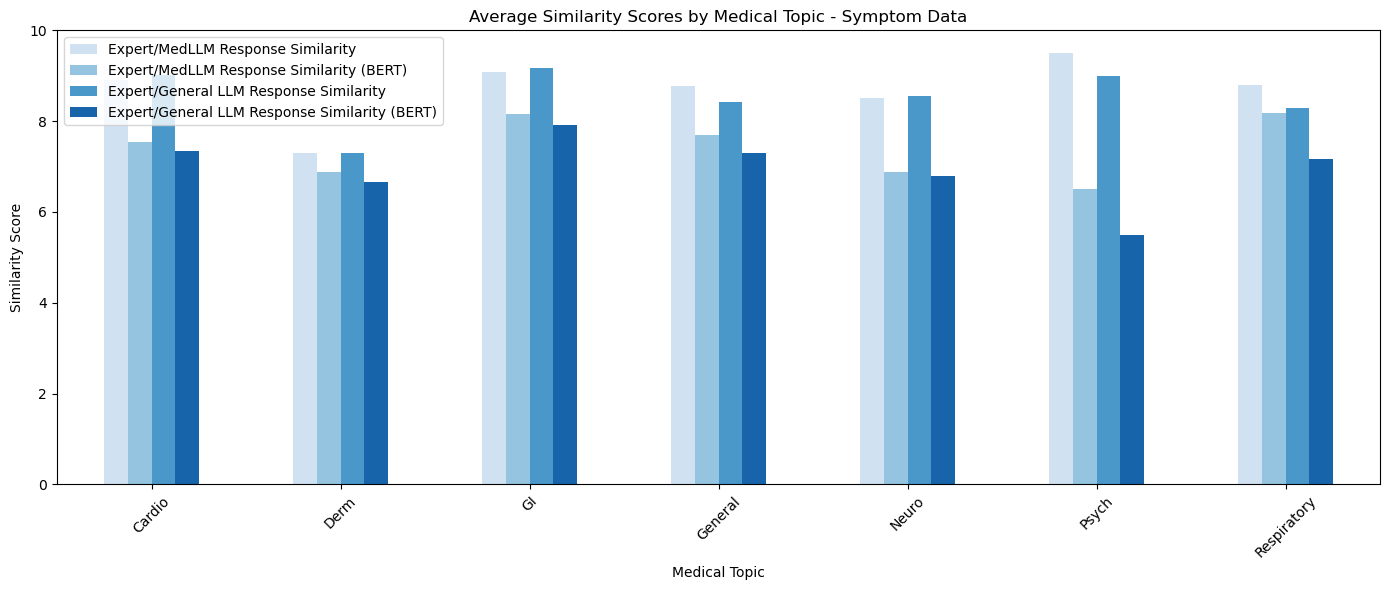

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(14, 6))

blue_palette = sns.color_palette("Blues", n_colors=4)

topic_summary.set_index('topic').plot(kind='bar', ax=ax, color=blue_palette)

ax.set_title('Average Similarity Scores by Medical Topic - Symptom Data')
ax.set_ylabel('Similarity Score')
ax.set_xlabel('Medical Topic')
ax.set_ylim(0, 10)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()